<a href="https://colab.research.google.com/github/S3IFK/Practise/blob/main/Regularization_D_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
X,y = make_moons(100, noise=0.25, random_state=2)

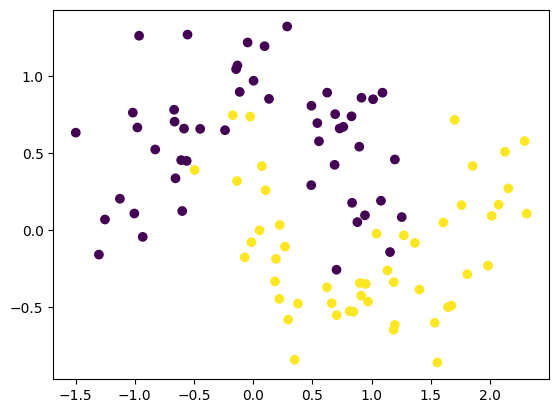

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(128,input_dim=2, activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(X,y, epochs=2000, validation_split= 0.2, verbose=0)

9600/9600 [==============================] - 14s 1ms/step


TypeError: ignored

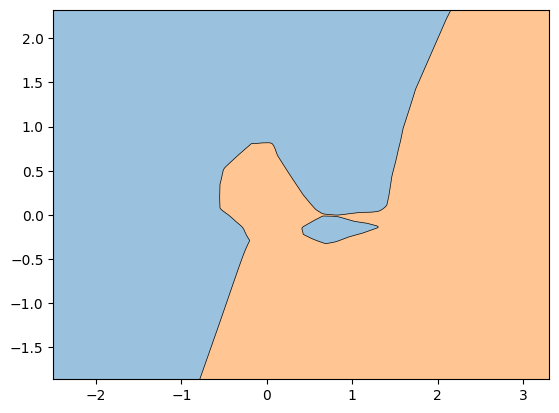

In [ ]:
plot_decision_regions(X,y, clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

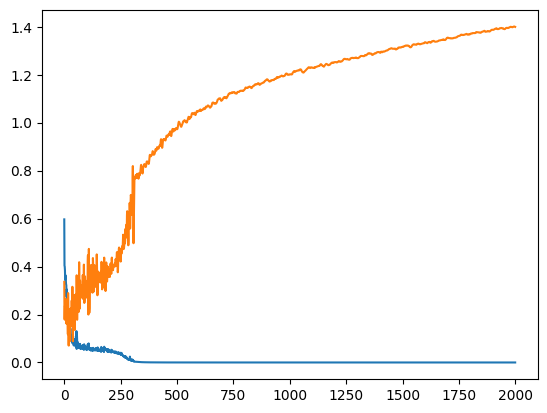

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model1 = Sequential()

In [ ]:
model1.add(Dense(128, input_dim=2, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model1.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X,y, epochs=2000, validation_split=0.2, verbose=0)

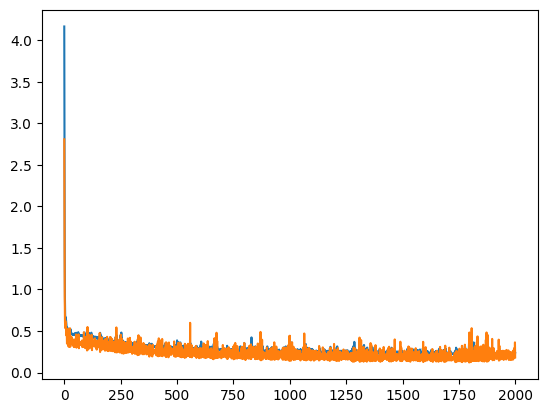

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

(array([  1.,   5.,   0.,  19.,   0.,  43., 182.,   0., 996., 754.]),
 array([0.69999999, 0.72999999, 0.75999999, 0.78999999, 0.81999999,
        0.84999999, 0.88      , 0.91      , 0.94      , 0.97      ,
        1.        ]),
 <BarContainer object of 10 artists>)

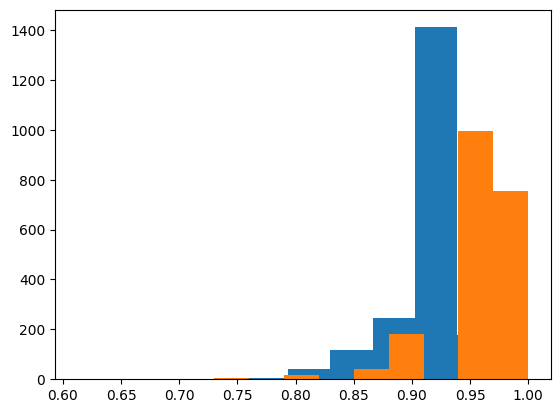

In [ ]:
plt.hist(history1.history['accuracy'])
plt.hist(history1.history['val_accuracy'])